In [1]:
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/jbrichardet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jbrichardet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jbrichardet/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/jbrichardet/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Import des données

In [3]:
dataset = pd.read_csv('dataset.csv')[['Body', 'Tags']]
dataset

,Body,Tags
0,<p>I have a UIImageView that I have already se...,<iphone><uiimageview><uiimage>
1,<blockquote>\n <p><strong>Possible Duplicate:...,<delphi><file-permissions>
2,<h2>The requirements I'm up against</h2>\n\n<p...,<c#><winforms>
3,"<p>I keep getting the following error ""Could n...",<wcf><https><transport><credentials>
4,<p>I am using the xml-simple gem inside a rake...,<ruby><xml><xml-simple>
...,...,...
99707,<p>Is it possible to have a singleton in a fac...,<java>
99708,<p>I was wondering if there is some option to ...,<c#><visual-studio-2008><resharper><using-dire...
99709,"<p>I have found the ""Getting Started"" document...",<iphone><xcode>
99710,"<p>I have a 2D area with ""dots"" distributed on...",<algorithm><data-structures><image-processing>


# Suppression des tags les moins communs

In [4]:
dataset['Tags'] = dataset['Tags'].str.split(r'<(.+?)>').apply(lambda x: [tag for tag in x if tag != ''])

In [5]:
tagsFreq = dataset['Tags'].to_frame().apply(lambda x : pd.Series([x['Tags'], nltk.FreqDist(x['Tags'])], index=['tokens', 'frequency']), axis=1, result_type='expand')

In [6]:
total_freq = {}
for dictionnary in tagsFreq['frequency']:
    for k,v in dictionnary.items():
        if k in total_freq:
            total_freq[k] += v
        else:
            total_freq[k] = v

freq_list = sorted(total_freq.items(), key=lambda x: x[1], reverse=True)
freq_list

[('c#', 11112),
 ('java', 7667),
 ('.net', 6707),
 ('javascript', 6300),
 ('php', 5567),
 ('c++', 4964),
 ('asp.net', 4824),
 ('python', 4671),
 ('jquery', 3406),
 ('html', 3278),
 ('sql', 3174),
 ('sql-server', 2610),
 ('mysql', 2528),
 ('android', 2433),
 ('iphone', 2372),
 ('css', 2162),
 ('c', 2065),
 ('windows', 1880),
 ('ruby-on-rails', 1706),
 ('database', 1619),
 ('visual-studio', 1492),
 ('xml', 1482),
 ('ruby', 1471),
 ('wpf', 1370),
 ('asp.net-mvc', 1370),
 ('objective-c', 1317),
 ('vb.net', 1214),
 ('winforms', 1200),
 ('linux', 1198),
 ('regex', 1183),
 ('performance', 1086),
 ('ajax', 1041),
 ('arrays', 984),
 ('visual-studio-2008', 916),
 ('multithreading', 914),
 ('oracle', 897),
 ('django', 883),
 ('algorithm', 879),
 ('string', 878),
 ('svn', 856),
 ('web-services', 852),
 ('unit-testing', 820),
 ('security', 801),
 ('linq', 801),
 ('ios', 772),
 ('eclipse', 752),
 ('macos', 724),
 ('user-interface', 711),
 ('excel', 702),
 ('winapi', 697),
 ('perl', 695),
 ('sql-serv

In [7]:
idx, values = zip(*freq_list)
frequencies = pd.Series(values, idx)
frequencies.describe()

count    16255.000000
mean        17.786835
std        175.048205
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      11112.000000
dtype: float64

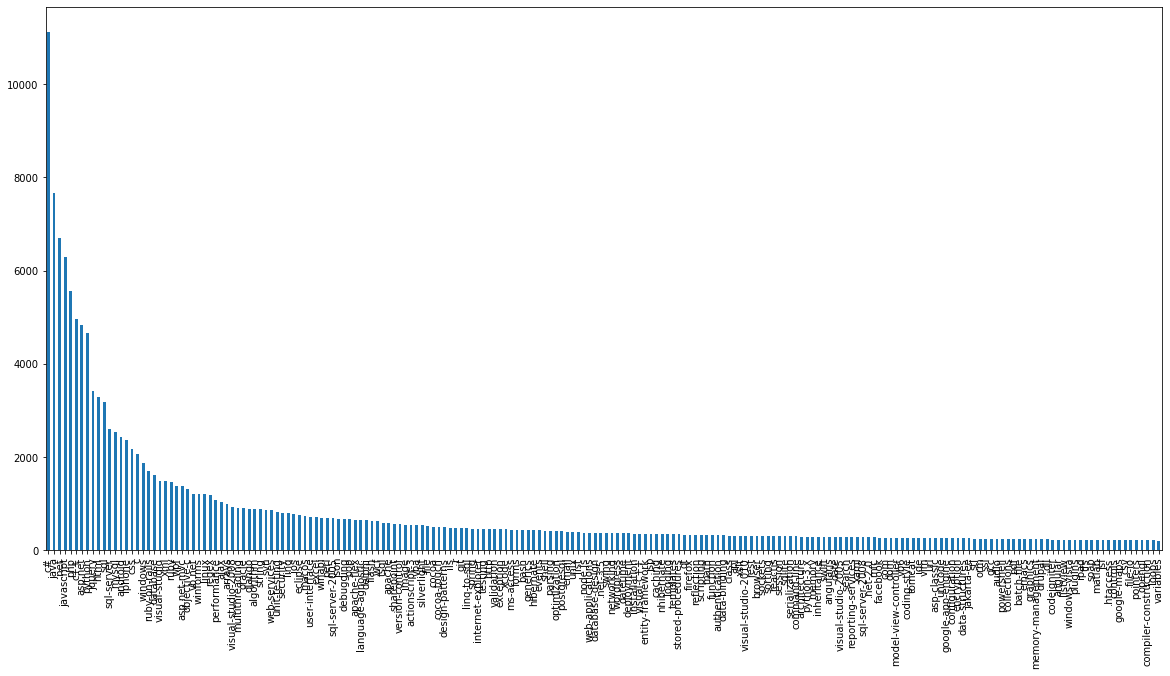

count      200.00000
mean       819.00000
std       1348.47927
min        206.00000
25%        271.75000
50%        367.00000
75%        695.50000
max      11112.00000
dtype: float64

In [8]:
top = frequencies.head(200)
top.plot(kind='bar', figsize=(20, 10))
plt.show()
top.describe()

## Filtre des tags apparaissant moins de 200 fois

In [9]:
# Passer le threshold à 500 ?
keeped_tags = frequencies[frequencies >= 300]
tags = dataset['Tags'].apply(lambda x: [tag for tag in x if tag in keeped_tags])
tags = tags[tags.str.len() != 0]
tags

0                        [iphone]
1                        [delphi]
2                  [c#, winforms]
3                           [wcf]
4                     [ruby, xml]
                   ...           
99707                      [java]
99708    [c#, visual-studio-2008]
99709             [iphone, xcode]
99710                 [algorithm]
99711                      [xslt]
Name: Tags, Length: 85759, dtype: object

In [10]:
keeped_tags

c#                    11112
java                   7667
.net                   6707
javascript             6300
php                    5567
                      ...  
xslt                    311
visual-studio-2010      308
rest                    306
browser                 306
sockets                 305
Length: 129, dtype: int64

In [11]:
dataset = dataset.loc[tags.index]

# Tokenization

## TODO 
Vérifier la langue du dataset: https://stackoverflow.com/questions/39142778/python-how-to-determine-the-language
Supprimer les langues non-anglaise

In [12]:
from langdetect import detect
lang = dataset['Body'].apply(detect)
lang

0        en
1        en
2        en
3        en
4        en
         ..
99707    en
99708    en
99709    en
99710    en
99711    en
Name: Body, Length: 85759, dtype: object

In [13]:
dataset.drop(lang[lang != 'en'].index, inplace=True)

In [14]:
html_tags_re = re.compile("<.+?>|\\n|\\/g")
posts = dataset['Body'].str.replace(html_tags_re, '')

In [15]:
tokenizer = nltk.RegexpTokenizer(r'[a-zA-Z]+')
tokens = posts.str.lower().map(tokenizer.tokenize)
tokens

0        [i, have, a, uiimageview, that, i, have, alrea...
1        [possible, duplicate, how, can, i, use, delphi...
2        [the, requirements, i, m, up, againstabout, pe...
3        [i, keep, getting, the, following, error, coul...
4        [i, am, using, the, xml, simple, gem, inside, ...
                               ...                        
99707    [is, it, possible, to, have, a, singleton, in,...
99708    [i, was, wondering, if, there, is, some, optio...
99709    [i, have, found, the, getting, started, docume...
99710    [i, have, a, d, area, with, dots, distributed,...
99711    [for, a, stylesheet, i, m, writing, actually, ...
Name: Body, Length: 85492, dtype: object

## Nombre de mots par post

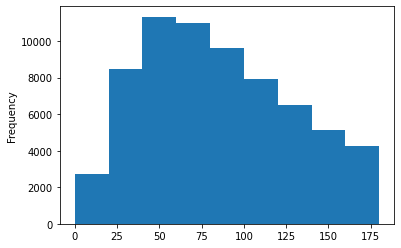

count    85492.00000
mean       135.97353
std        145.96689
min          2.00000
25%         57.00000
50%         99.00000
75%        166.00000
max       4061.00000
Name: Body, dtype: float64

In [16]:
posts_size = tokens.map(len)
posts_size.plot.hist(bins=np.arange(0, 200, 20))
plt.show()
posts_size.describe()

## Nombre de mots uniques par post

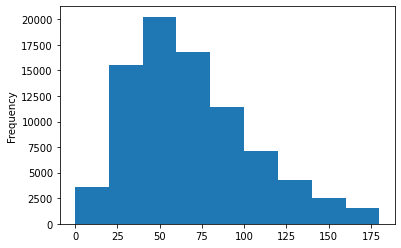

count    85492.000000
mean        72.616607
std         44.901055
min          2.000000
25%         42.000000
50%         63.000000
75%         93.000000
max        760.000000
Name: Body, dtype: float64

In [17]:
posts_unique_size = tokens.map(lambda x: len(np.unique(x)))
posts_unique_size.plot.hist(bins=np.arange(0,200,20))
plt.show()
posts_unique_size.describe()

# Recherche des mots les plus courants

In [18]:
vocabulary = tokens.to_frame().apply(lambda x : pd.Series([x['Body'], nltk.FreqDist(x['Body'])], index=['tokens', 'frequency']), axis=1, result_type='expand')
vocabulary

,tokens,frequency
0,"[i, have, a, uiimageview, that, i, have, alrea...","{'i': 6, 'have': 2, 'a': 3, 'uiimageview': 4, ..."
1,"[possible, duplicate, how, can, i, use, delphi...","{'possible': 1, 'duplicate': 1, 'how': 1, 'can..."
2,"[the, requirements, i, m, up, againstabout, pe...","{'the': 16, 'requirements': 1, 'i': 3, 'm': 1,..."
3,"[i, keep, getting, the, following, error, coul...","{'i': 5, 'keep': 1, 'getting': 1, 'the': 4, 'f..."
4,"[i, am, using, the, xml, simple, gem, inside, ...","{'i': 1, 'am': 1, 'using': 1, 'the': 5, 'xml':..."
...,...,...
99707,"[is, it, possible, to, have, a, singleton, in,...","{'is': 1, 'it': 1, 'possible': 1, 'to': 1, 'ha..."
99708,"[i, was, wondering, if, there, is, some, optio...","{'i': 2, 'was': 1, 'wondering': 1, 'if': 1, 't..."
99709,"[i, have, found, the, getting, started, docume...","{'i': 4, 'have': 1, 'found': 1, 'the': 3, 'get..."
99710,"[i, have, a, d, area, with, dots, distributed,...","{'i': 2, 'have': 1, 'a': 2, 'd': 1, 'area': 2,..."


In [19]:
dfs = [pd.DataFrame.from_dict(value, orient='index') for value in vocabulary['frequency'].values]
dfs

[              0
 i             6
 have          2
 a             3
 uiimageview   4
 that          3
 already       1
 set           3
 an            1
 image        11
 to            3
 this          1
 works         1
 fine          1
 but           2
 later         1
 want          1
 change        1
 so            1
 new           1
 for           1
 the           4
 property      1
 when          1
 view          1
 app           1
 is            1
 as            1
 second        1
 over          1
 first         1
 cell          1
 viewwithtag   1
 uiimage       1
 imagenamed    1
 history       1
 row           1
 png           1
 how           1
 can           1
 replace       1
 current       1
 in            1
 my            1
 rather        1
 than          1
 seeming       1
 add           1
 another       1,
              0
 possible     1
 duplicate    1
 how          1
 can          1
 i            2
 ...         ..
 check        1
 write        1
 permissions  1
 on   

In [20]:
total_freq = {}
for dictionnary in vocabulary['frequency']:
    for k,v in dictionnary.items():
        if k in total_freq:
            total_freq[k] += v
        else:
            total_freq[k] = v

In [21]:
freq_list = sorted(total_freq.items(), key=lambda x: x[1], reverse=True)
freq_list

[('the', 443170),
 ('i', 360790),
 ('to', 307716),
 ('a', 254549),
 ('gt', 195264),
 ('lt', 178658),
 ('is', 165715),
 ('and', 152221),
 ('in', 147371),
 ('of', 125581),
 ('this', 116965),
 ('it', 115440),
 ('that', 106159),
 ('for', 88621),
 ('have', 73598),
 ('on', 63074),
 ('but', 61765),
 ('with', 61743),
 ('if', 61539),
 ('my', 61272),
 ('be', 57248),
 ('t', 53217),
 ('can', 53045),
 ('as', 52461),
 ('not', 50784),
 ('s', 46618),
 ('an', 46209),
 ('from', 45209),
 ('m', 45030),
 ('do', 43296),
 ('or', 40886),
 ('like', 38081),
 ('class', 37735),
 ('using', 37689),
 ('there', 37496),
 ('so', 37348),
 ('id', 36665),
 ('how', 36607),
 ('new', 36569),
 ('code', 36537),
 ('what', 35298),
 ('are', 35181),
 ('when', 33918),
 ('get', 33813),
 ('c', 33535),
 ('name', 32544),
 ('at', 32093),
 ('data', 32047),
 ('file', 32005),
 ('am', 31434),
 ('string', 31019),
 ('would', 30620),
 ('any', 30542),
 ('use', 28861),
 ('you', 28000),
 ('which', 27370),
 ('want', 26923),
 ('some', 26873),
 ('al

In [22]:
idx, values = zip(*freq_list)
frequencies = pd.Series(values, idx)
frequencies.describe()

count    231302.000000
mean         50.257451
std        1873.288871
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max      443170.000000
dtype: float64

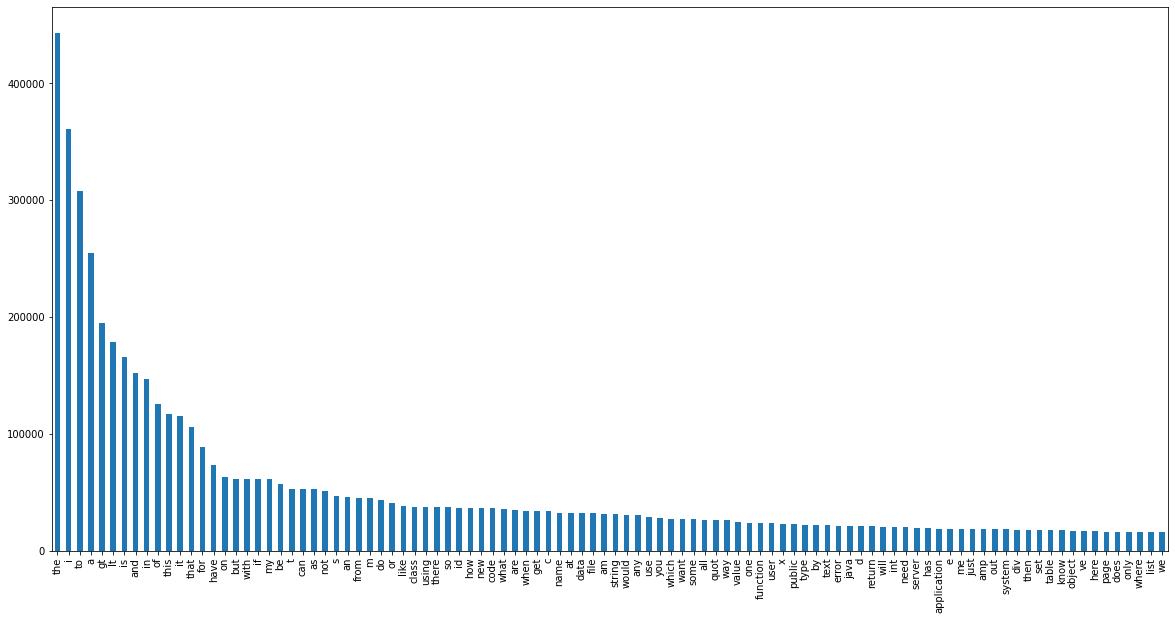

count       100.000000
mean      54078.710000
std       70766.653355
min       15938.000000
25%       20515.500000
50%       31226.500000
75%       47659.500000
max      443170.000000
dtype: float64

In [23]:
top = frequencies.head(100)
top.plot(kind='bar', figsize=(20, 10))
plt.show()
top.describe()

15

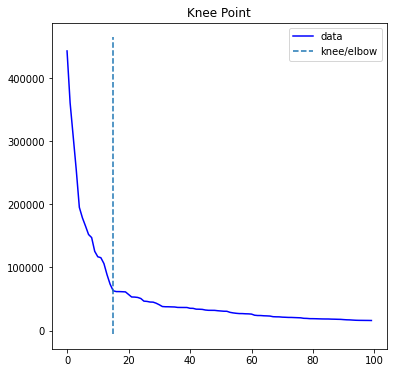

In [24]:
knee = KneeLocator([i for i,_ in enumerate(top.index.values)], top.values, curve='convex', direction='decreasing')
knee.plot_knee()
knee.knee

In [25]:
frequencies.iloc[:knee.knee+1]

the     443170
i       360790
to      307716
a       254549
gt      195264
lt      178658
is      165715
and     152221
in      147371
of      125581
this    116965
it      115440
that    106159
for      88621
have     73598
on       63074
dtype: int64

# Création d'une liste de stopwords

In [26]:
en_stopwords = nltk.corpus.stopwords.words('english')
to_drop = frequencies.index.intersection(en_stopwords)
to_drop

Index(['the', 'i', 'to', 'a', 'is', 'and', 'in', 'of', 'this', 'it',
       ...
       'himself', 'whom', 'yours', 'ain', 'mustn', 'herself', 'shan',
       'yourselves', 'needn', 'hers'],
      dtype='object', length=152)

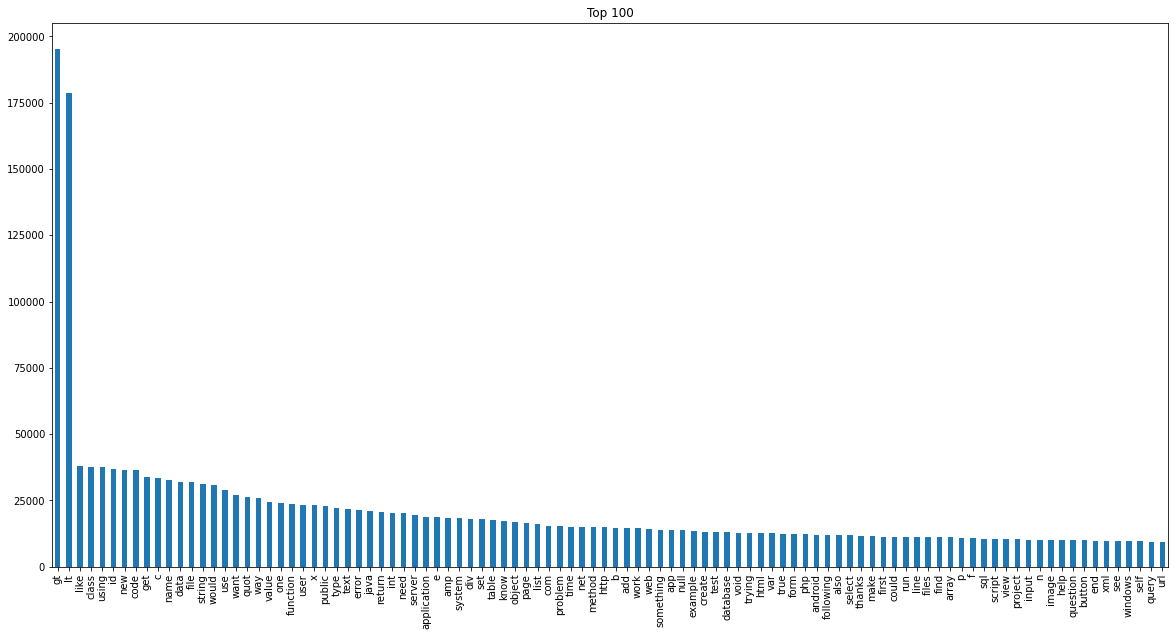

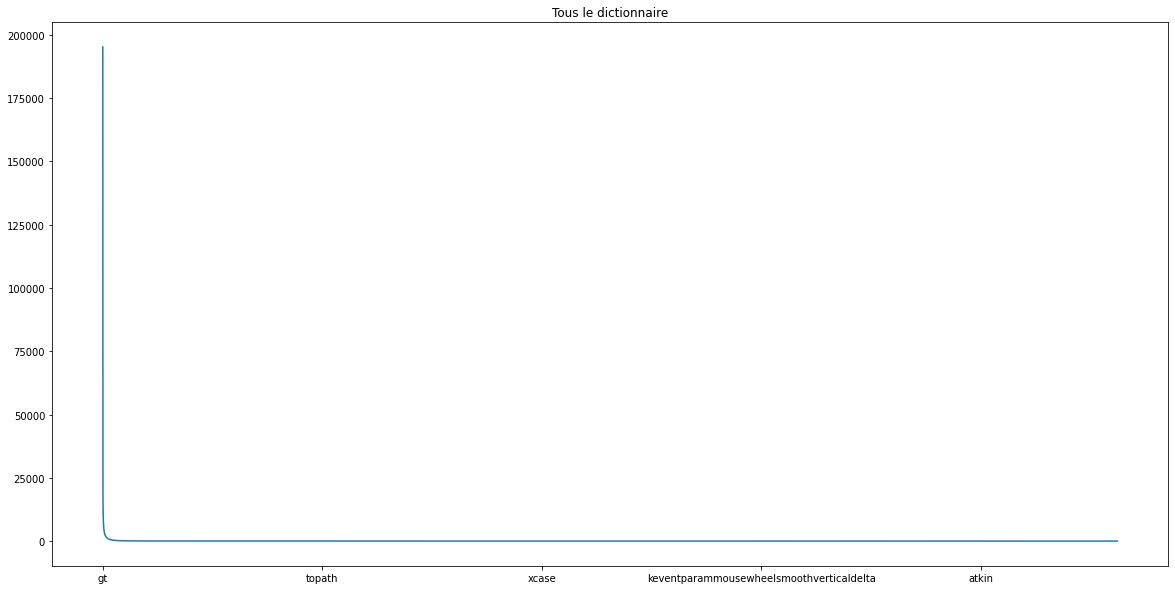

count    231150.000000
mean         31.263820
std         717.249751
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max      195264.000000
dtype: float64

In [27]:
freq_wo_stop = frequencies.drop(to_drop)
freq_wo_stop.head(100).plot(kind='bar', figsize=(20,10))
plt.title('Top 100')
plt.show()
freq_wo_stop.plot(figsize=(20,10))
plt.title('Tous le dictionnaire')
plt.show()
freq_wo_stop.describe()

74

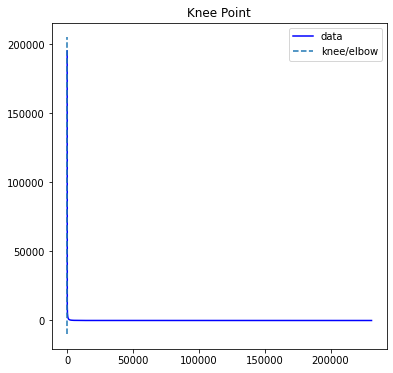

In [28]:
knee = KneeLocator([i for i,_ in enumerate(freq_wo_stop.index.values)], freq_wo_stop.values, curve='convex', direction='decreasing')
knee.plot_knee()
knee.knee

In [29]:
sw = freq_wo_stop[:knee.knee+1].index.tolist() + en_stopwords
sw

['gt',
 'lt',
 'like',
 'class',
 'using',
 'id',
 'new',
 'code',
 'get',
 'c',
 'name',
 'data',
 'file',
 'string',
 'would',
 'use',
 'want',
 'quot',
 'way',
 'value',
 'one',
 'function',
 'user',
 'x',
 'public',
 'type',
 'text',
 'error',
 'java',
 'return',
 'int',
 'need',
 'server',
 'application',
 'e',
 'amp',
 'system',
 'div',
 'set',
 'table',
 'know',
 'object',
 'page',
 'list',
 'com',
 'problem',
 'time',
 'net',
 'method',
 'http',
 'b',
 'add',
 'work',
 'web',
 'something',
 'app',
 'null',
 'example',
 'create',
 'test',
 'database',
 'void',
 'trying',
 'html',
 'var',
 'true',
 'form',
 'php',
 'android',
 'following',
 'also',
 'select',
 'thanks',
 'make',
 'first',
 'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 't

# Recalcul de la taille par post sans stopwords

In [30]:
normalized_tokens = posts.str.lower().map(lambda x: [token for token in tokenizer.tokenize(x) if not token in sw])
normalized_tokens

0        [uiimageview, already, image, works, fine, lat...
1        [possible, duplicate, delphi, directory, write...
2        [requirements, againstabout, people, allow, cl...
3        [keep, getting, could, find, base, address, ma...
4        [xml, simple, gem, inside, rake, task, parse, ...
                               ...                        
99707    [possible, singleton, factory, many, domains, ...
99708    [wondering, option, keep, resharper, removing,...
99709    [found, getting, started, documents, developin...
99710    [area, dots, distributed, area, detect, cluste...
99711    [stylesheet, writing, actually, generating, di...
Name: Body, Length: 85492, dtype: object

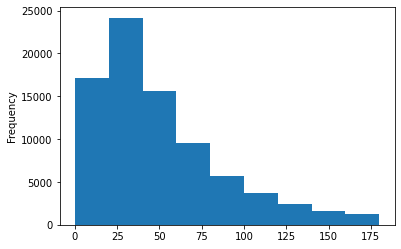

count    85492.000000
mean        62.929338
std         85.459592
min          0.000000
25%         23.000000
50%         41.000000
75%         74.000000
max       2831.000000
Name: Body, dtype: float64

In [31]:
norm_posts_size = normalized_tokens.map(len)
norm_posts_size.plot.hist(bins=np.arange(0, 200, 20))
plt.show()
norm_posts_size.describe()

# Lemmatisation

In [32]:
wnl = WordNetLemmatizer()
lem_tokens = normalized_tokens.map(lambda x: [wnl.lemmatize(w) for w in x])
lem_tokens

0        [uiimageview, already, image, work, fine, late...
1        [possible, duplicate, delphi, directory, write...
2        [requirement, againstabout, people, allow, clo...
3        [keep, getting, could, find, base, address, ma...
4        [xml, simple, gem, inside, rake, task, parse, ...
                               ...                        
99707    [possible, singleton, factory, many, domain, f...
99708    [wondering, option, keep, resharper, removing,...
99709    [found, getting, started, document, developing...
99710    [area, dot, distributed, area, detect, cluster...
99711    [stylesheet, writing, actually, generating, di...
Name: Body, Length: 85492, dtype: object

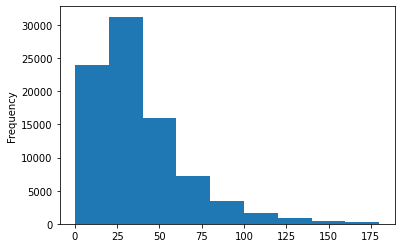

count    85492.000000
mean        38.144353
std         30.613136
min          0.000000
25%         18.000000
50%         30.000000
75%         49.000000
max        596.000000
Name: Body, dtype: float64

In [33]:
lem_posts_unique_size = lem_tokens.map(lambda x: len(np.unique(x)))
lem_posts_unique_size.plot.hist(bins=np.arange(0,200,20))
plt.show()
lem_posts_unique_size.describe()

# Merge

In [34]:
dataset['Body'] = lem_tokens
dataset.reset_index(inplace=True, drop=True)
dataset

,Body,Tags
0,"[uiimageview, already, image, work, fine, late...","[iphone, uiimageview, uiimage]"
1,"[possible, duplicate, delphi, directory, write...","[delphi, file-permissions]"
2,"[requirement, againstabout, people, allow, clo...","[c#, winforms]"
3,"[keep, getting, could, find, base, address, ma...","[wcf, https, transport, credentials]"
4,"[xml, simple, gem, inside, rake, task, parse, ...","[ruby, xml, xml-simple]"
...,...,...
85487,"[possible, singleton, factory, many, domain, f...",[java]
85488,"[wondering, option, keep, resharper, removing,...","[c#, visual-studio-2008, resharper, using-dire..."
85489,"[found, getting, started, document, developing...","[iphone, xcode]"
85490,"[area, dot, distributed, area, detect, cluster...","[algorithm, data-structures, image-processing]"


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85492 entries, 0 to 85491
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    85492 non-null  object
 1   Tags    85492 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [36]:
dataset['Body'].values

array([list(['uiimageview', 'already', 'image', 'work', 'fine', 'later', 'change', 'image', 'image', 'image', 'property', 'view', 'image', 'second', 'image', 'uiimageview', 'image', 'image', 'uiimageview', 'cell', 'viewwithtag', 'image', 'image', 'uiimage', 'imagenamed', 'history', 'row', 'png', 'replace', 'current', 'image', 'uiimageview', 'rather', 'seeming', 'another']),
       list(['possible', 'duplicate', 'delphi', 'directory', 'writeable', 'program', 'download', 'update', 'request', 'specify', 'location', 'save', 'installer', 'might', 'pick', 'directory', 'access', 'save', 'case', 'download', 'start', 'downloading', 'temporary', 'directory', 'assume', 'failed', 'end', 'try', 'move', 'folder', 'simple', 'check', 'write', 'permission', 'folder', 'delhi']),
       list(['requirement', 'againstabout', 'people', 'allow', 'close', 'traditional', 'method', 'alt', 'f', 'exit', 'close', 'used', 'taskmanager', 'windowsshutdown', 'allowed', 'user', 'close', 'perform', 'clean', 'closing', '

In [37]:
body_content = [' '.join(words) for words in dataset['Body'].values]
dataset['Body'] = body_content
dataset.drop(dataset[dataset['Body'] == ''].index, inplace=True)

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85488 entries, 0 to 85491
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    85488 non-null  object
 1   Tags    85488 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [39]:
dataset.to_csv('./cleaned_dataset.csv', index=False)

# Vectorisation

## CountVectorizer

In [40]:
df2 = pd.read_csv('./cleaned_dataset.csv')
df2[df2['Body'].isna()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85488 entries, 0 to 85487
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    85488 non-null  object
 1   Tags    85488 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [41]:
bodyContent = [' '.join(words) for words in dataset['Body'].values]

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
# utiliser max_feature et tuner l'hyperparametre. Justifier en regardant les features ecartées
count_vectorizer = CountVectorizer(lowercase=False,max_features=3000)
count_matrix = count_vectorizer.fit_transform(dataset['Body'])
df = pd.DataFrame(count_matrix.toarray(), index=dataset.index, columns=count_vectorizer.get_feature_names_out())
df.reset_index(inplace=True, drop=True)
df

,aa,aaa,ab,abc,ability,able,absolute,absolutely,abstract,ac,...,yield,youtube,yyyy,za,zend,zero,zip,zone,zoom,zygoteinit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
85486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Testons de rajouter les 500 mots suivants et regardons la différence de vocabulaire

In [70]:
count_vectorizer.stop_words_

{'authorendwhile',
 'etsy',
 'mueller',
 'wna',
 'fooetc',
 'infixb',
 'notusedatm',
 'wwan',
 'firstsunday',
 'adod',
 'misvisible',
 'nonquoted',
 'unfounded',
 'hostingparameters',
 'coursemanagement',
 'pnewball',
 'demystify',
 'struseremail',
 'methodssymbolic',
 'distruction',
 'widthbasically',
 'bytearraytostruct',
 'firstdice',
 'rpx',
 'adlockoptimisticnext',
 'addressorg',
 'questionis',
 'viewhttps',
 'mimeole',
 'icontentrepository',
 'calculatorclient',
 'partialmock',
 'abovehow',
 'xllinemarkers',
 'somegeneratedxml',
 'relocated',
 'isdos',
 'positionchanged',
 'cyclesare',
 'intrants',
 'computenewcenter',
 'pce',
 'editfor',
 'hellohellobecause',
 'idsparts',
 'qualifiedusername',
 'bicwebws',
 'getpostbyid',
 'everybodyhere',
 'wrdapp',
 'vbahas',
 'shockwave',
 'getframerate',
 'quesnewcancelbutton',
 'callbackmode',
 'atomikosdatasourcebean',
 'falsealso',
 'htmlmt',
 'emaili',
 'challengethe',
 'tempmaxdura',
 'playcontrollerbar',
 'sethttprequestcheckhandler',


In [43]:
count_vectorizer_max = CountVectorizer(lowercase=False,max_features=3500)
count_vectorizer_max.fit(bodyContent)
count_vectorizer_max.vocabulary_

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
set(count_vectorizer.vocabulary_) ^ set(count_vectorizer_max.vocabulary_)

Rien ne semble extrêmement spécifique dans cette liste, il ne semble donc pas que nous ayons perdu beaucoup d'informations.

# Réduction de dimensions

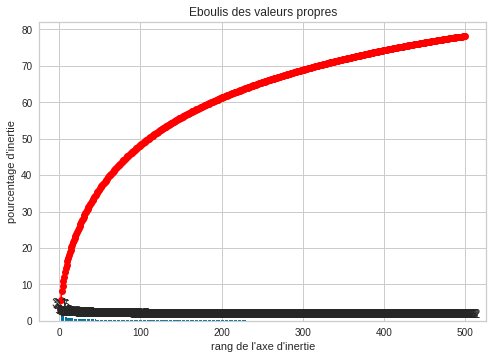

Pourcentage d'inertie: 78.17157757263469%


In [58]:
from sklearn.decomposition import PCA
import functions

pca = PCA(n_components=500)
pca.fit(df)
functions.display_scree_plot(pca)
print(f'Pourcentage d\'inertie: {pca.explained_variance_ratio_.cumsum()[-1] * 100}%')

In [ ]:
from yellowbrick.features import PCA
visualizer = PCA(scale=True)
visualizer.fit_transform(df)
visualizer.show()

# Clustering

# TODO
Regarder le MiniBatchKmeans

In [55]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# Regarder autour de 20
kelbow_viz = KElbowVisualizer(MiniBatchKMeans(), k=(16,24))
kelbow_viz.fit(df)
kelbow_viz.show()

In [59]:
X = pca.transform(df)
kmeans = MiniBatchKMeans(17)
kmeans.fit(X)

MiniBatchKMeans(n_clusters=17)

In [60]:
labels = pd.Series(kmeans.labels_, name='cluster-label')
print(labels)
dict(labels.value_counts())

0        10
1         0
2         0
3         0
4         3
         ..
85483     3
85484     3
85485     3
85486     3
85487     0
Name: cluster-label, Length: 85488, dtype: int32


{3: 36567,
 0: 30150,
 9: 4145,
 8: 3818,
 16: 1461,
 13: 1383,
 10: 1286,
 12: 1273,
 15: 1095,
 6: 972,
 1: 841,
 14: 708,
 2: 491,
 7: 376,
 11: 347,
 4: 312,
 5: 263}

In [ ]:
print(dataset.shape)
print(df.shape)
print(labels.shape)

In [65]:
df_label = df.assign(cluster_label=labels, tags=dataset['Tags'])
df_label

,aa,aaa,ab,abc,ability,able,absolute,absolutely,abstract,ac,...,yyyy,za,zend,zero,zip,zone,zoom,zygoteinit,cluster_label,tags
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,"[iphone, uiimageview, uiimage]"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[delphi, file-permissions]"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[c#, winforms]"
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[wcf, https, transport, credentials]"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,"[ruby, xml, xml-simple]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,"[windows, command-line]"
85484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,"[web-applications, gettext]"
85485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3,"[sql-server, sql-server-2008, sql-server-2005,..."
85486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,"[c++, boost, ptr-vector]"


In [66]:
cluster_sum = df_label.groupby('cluster_label').sum()
cluster_sum

,aa,aaa,ab,abc,ability,able,absolute,absolutely,abstract,ac,...,yield,youtube,yyyy,za,zend,zero,zip,zone,zoom,zygoteinit
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,151,87,203,372,267,3850,146,135,470,81,...,188,103,199,121,190,403,421,129,75,60
1,4,1,2,3,15,145,17,7,9,3,...,8,1,10,5,0,10,4,0,5,0
2,6,1,8,3,4,81,0,1,10,18,...,3,11,1,12,54,10,4,4,5,0
3,84,41,66,244,141,1592,76,43,180,40,...,67,68,124,73,81,158,158,71,65,0
4,5,1,2,2,7,43,2,0,12,4,...,1,2,2,0,0,7,3,0,0,4
5,2,0,4,2,1,28,7,0,2,3,...,3,3,3,0,0,2,18,1,5,0
6,25,2,13,15,7,171,4,6,10,50,...,16,19,9,3,2,42,8,4,0,18
7,5,1,4,2,2,51,23,2,0,4,...,0,3,2,3,8,7,3,0,8,8
8,24,25,18,18,26,467,40,21,40,19,...,7,31,21,16,9,54,54,27,57,0


In [67]:
for label in cluster_sum.index:
    print(f'Topics: {cluster_sum.loc[label].sort_values(ascending=False).head(10).index.to_list()}')
    labels_tag = set([tag for tags in df_label[df_label['cluster_labels'] == label]['Tags'].to_list() for tag in tags])
    print(f'Tags: {labels_tag}')
    print('-----')

Topics: ['line', 'question', 'window', 'could', 'run', 'file', 'call', 'find', 'xml', 'see']


KeyError: 'cluster_labels'

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors

df_sample = df.sample(frac=0.5)
nb_neighbors = 10
nearest_neighbors = NearestNeighbors(n_neighbors=nb_neighbors)
nearest_neighbors.fit(df_sample)
distances, _ = nearest_neighbors.kneighbors(df_sample)

# Get max distance between neighbors
max_distances = np.sort(distances[:, nb_neighbors - 1])

# Find an elbow
index = np.arange(len(max_distances))
knee = KneeLocator(index, max_distances, curve='convex',
                   direction='increasing', interp_method='polynomial')
knee.plot_knee(figsize=(10, 10))
plt.xlabel("Points")
plt.ylabel("Distance")

In [ ]:
knee.elbow_y

In [ ]:
dbscan = DBSCAN(min_samples=100, eps=knee.elbow_y)
dbscan.fit(df_sample)

In [ ]:
len(dbscan.labels_)

# TODO
* Regrouper les traitements dans une fonction

## Transformation en nombres
* [sklearn.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
* [sklearn.TfidfVectorizer](https://devdocs.io/scikit_learn/modules/generated/sklearn.feature_extraction.text.tfidfvectorizer#sklearn.feature_extraction.text.TfidfVectorizer)
* [GloVe](https://nlp.stanford.edu/projects/glove/)
* [FastText](https://fasttext.cc/)

## Approche non-supervisée
* PCA pour réduire la dimension (~3000 à 100aine)
* Clustering (K-means,...) pour regrouper les lignes par "topic". Reprendre le DF de départ pour retrouver les mots les plus utilisés du cluster.
* LDA

## Approche supervisée
* Classification multioutput [MultiOutputClassifier](https://devdocs.io/scikit_learn/modules/generated/sklearn.multioutput.multioutputclassifier#sklearn.multioutput.MultiOutputClassifier)
* Train test split (avec les tags)